# Determinental Point Process (DPP)

This notebook demonstrates how to draw random samples from FiniteDPP process defined by a square exponential similarity kernel with different values of lenght_scale and prefactor. 

For each combination of lenght_scale and prefactor, we draw a random sample and compute the average and the standard deviation in the number of objects.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy
from genus.util_ml import Grid_DPP
from genus.util_vis import show_batch

n_actual=  1, n_av=1.249 +/- 0.613, length_scale=20.0, weight=0.1
n_actual=  3, n_av=2.391 +/- 0.732, length_scale=20.0, weight=1.0
n_actual=  3, n_av=3.136 +/- 0.676, length_scale=20.0, weight=5.0
n_actual=  3, n_av=3.474 +/- 0.741, length_scale=20.0, weight=10.0
n_actual=  0, n_av=1.798 +/- 0.822, length_scale=10.0, weight=0.1
n_actual=  3, n_av=3.473 +/- 0.898, length_scale=10.0, weight=1.0
n_actual=  5, n_av=4.910 +/- 0.980, length_scale=10.0, weight=5.0
n_actual=  6, n_av=5.564 +/- 0.973, length_scale=10.0, weight=10.0
n_actual=  2, n_av=2.842 +/- 1.111, length_scale=5.0, weight=0.1
n_actual=  8, n_av=6.138 +/- 1.267, length_scale=5.0, weight=1.0
n_actual=  7, n_av=8.851 +/- 1.336, length_scale=5.0, weight=5.0
n_actual= 12, n_av=10.106 +/- 1.360, length_scale=5.0, weight=10.0
n_actual= 10, n_av=7.920 +/- 2.525, length_scale=1.0, weight=0.1
n_actual= 32, n_av=33.326 +/- 3.844, length_scale=1.0, weight=1.0
n_actual= 54, n_av=58.080 +/- 3.887, length_scale=1.0, weight=5.0
n_actual= 6

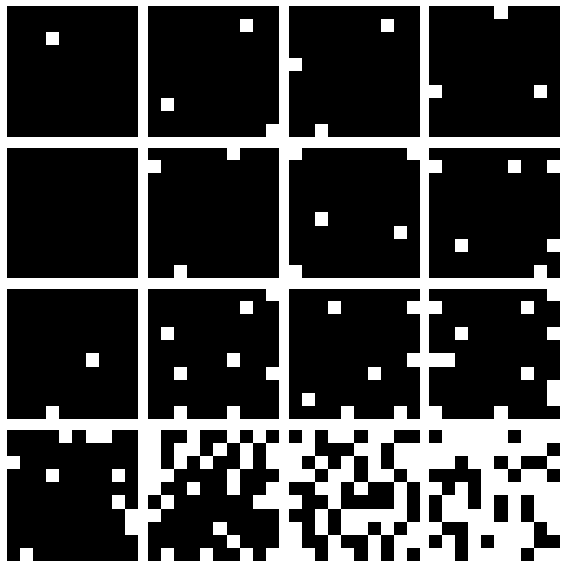

In [2]:
grid_size = 10
with torch.no_grad():
    fig, ax =  plt.subplots(ncols=4, nrows=4, figsize=(8,8))
    for r, length_scale in enumerate([20,10,5,1]):
        for c, prefactor in enumerate([0.1, 1, 5, 10]):
            DPP = Grid_DPP(length_scale=length_scale, weight=prefactor)
        
            value = DPP.sample(size=torch.Size([grid_size, grid_size]))  # draw a random samples on a grid'
            nc = value.sum(dim=(-1,-2)).item()
            logp = DPP.log_prob(value=value)
            n_av = DPP.n_mean.item()
            n_stddev = DPP.n_stddev.item()
            print("n_actual={0:3d}, n_av={1:.3f} +/- {2:.3f}, length_scale={3:.1f}, weight={4:2.1f}".format(nc, n_av, n_stddev, length_scale, prefactor))
        
            ax[r,c].axis('off')
            ax[r,c].imshow(value, cmap='gray')
    fig.tight_layout()
    fig.savefig("./DPP_samples.png")

### Select one setting and draw many samples

You can change the value of lenght_scale and weight till you find the combination which generates the expected number of samples

In [3]:
grid_size = 10

DPP = Grid_DPP(length_scale=10, weight=1.2)
value = DPP.sample(size=torch.Size([grid_size, grid_size]))
print("n_avg ={0:.3f}, n_stdev={1:.3f}".format(DPP.n_mean.item(), DPP.n_variance.item()))

n_avg =3.621, n_stdev=0.831


Now we draw many random sample and compute the empirical density.
Note that due to the DPP repulsion the particle density is enhanced close to the boundaries

configurations.shape -> torch.Size([500, 10, 10])


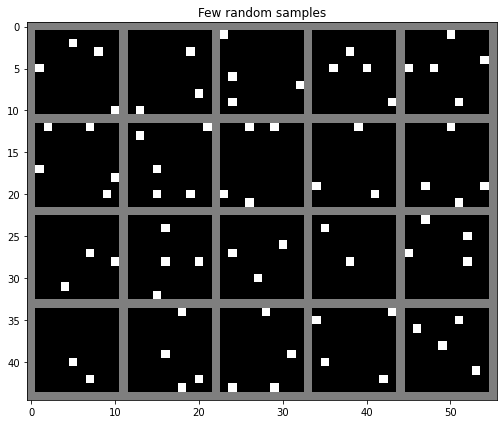

In [10]:
n_samples=500
value = DPP.sample(size=torch.Size([n_samples, grid_size, grid_size]))
print("configurations.shape ->",value.shape)
show_batch(value[:20].unsqueeze(-3).float(), n_col=5, pad_value=0.5, n_padding=1, 
           title="Few random samples", figsize=(12,6))

configurations.shape -> torch.Size([500, 10, 10])
n_avg=3.621, n_std=0.911


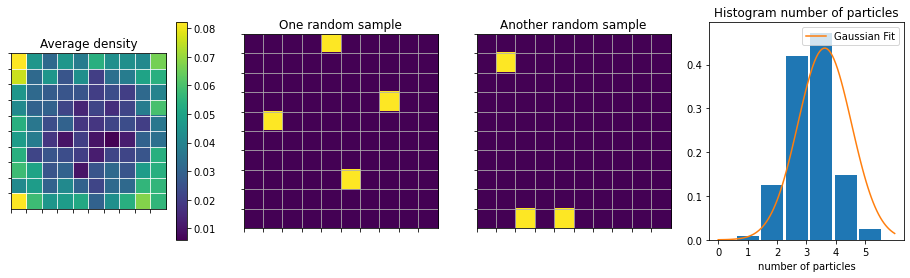

In [11]:
n_samples=500
value = DPP.sample(size=torch.Size([n_samples, grid_size, grid_size]))
print("configurations.shape ->",value.shape)

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(16, 4))

axes[0].set_title("Average density")
density = axes[0].imshow(value.float().mean(dim=-3))
axes[0].grid(color='white')
axes[0].set_xticks(ticks=torch.arange(value.shape[-1])-0.5)
axes[0].set_yticks(ticks=torch.arange(value.shape[-2])-0.5)
axes[0].set_xticklabels(labels="")
axes[0].set_yticklabels(labels="")
fig.colorbar(density, ax=axes[0])

axes[1].set_title("One random sample")
axes[1].imshow(value[0])
axes[1].grid()
axes[1].set_xticks(ticks=torch.arange(value.shape[-1])-0.5)
axes[1].set_yticks(ticks=torch.arange(value.shape[-2])-0.5)
axes[1].set_xticklabels(labels="")
axes[1].set_yticklabels(labels="")

axes[2].set_title("Another random sample")
axes[2].imshow(value[1])
axes[2].grid()
axes[2].set_xticks(ticks=torch.arange(value.shape[-1])-0.5)
axes[2].set_yticks(ticks=torch.arange(value.shape[-2])-0.5)
axes[2].set_xticklabels(labels="")
axes[2].set_yticklabels(labels="")

n_particles = value.sum(dim=(-1,-2))
n_max = torch.max(n_particles).item()
n_avg = DPP.n_mean.item()
n_var = DPP.n_variance.item()
n_stddev = DPP.n_stddev.item()
print("n_avg={0:.3f}, n_std={1:.3f}".format(n_avg,n_stddev))
x = torch.linspace(0,n_max,100)
y = torch.exp(-(x-n_avg)**2/(2*n_var)) / numpy.sqrt(2*numpy.pi*n_var)
axes[3].set_title("Histogram number of particles")
_ = axes[3].hist(n_particles, bins=n_max, align="left", rwidth=0.9, density=True)
_ = axes[3].plot(x,y,label="Gaussian Fit")
_ = axes[3].set_xticks(ticks=torch.arange(n_max))
_ = axes[3].set_xlabel("number of particles")
_ = axes[3].legend(loc='upper right')